# Loading the dataset


In [0]:
import pandas as pd
from sklearn.datasets import load_boston
boston_house=load_boston()
house_features=pd.DataFrame(boston_house.data)
house_features.columns=boston_house.feature_names
house_price=boston_house.target




#  Doing the data standardization 

In [0]:
from sklearn.preprocessing import StandardScaler
input_transform=StandardScaler()
house_features=input_transform.fit_transform(house_features)
output_transform=StandardScaler()
house_price=output_transform.fit_transform(house_price.reshape(-1, 1))
house_price=house_price.reshape(len(house_price))
#print(house_features)


# Split the data 

In [3]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(house_features,house_price,test_size=0.25)
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(379, 13) (379,) (127, 13) (127,)


# solving with sklearn linear regression

In [4]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr_plane=lr.fit(train_x,train_y)
print(lr_plane.coef_,lr_plane.intercept_)
sklearn_predicted=lr_plane.predict(test_x)

[-0.09376838  0.13215807  0.02370438  0.07940775 -0.26249487  0.23704872
  0.09815197 -0.33401176  0.30107779 -0.21152492 -0.25063005  0.0927545
 -0.48260768] 0.006800342075689676


#  Gradient descent algorithm implementation

No.of iterations required for converging 5699
The error is 25.123389382961335
0.006697613270936404


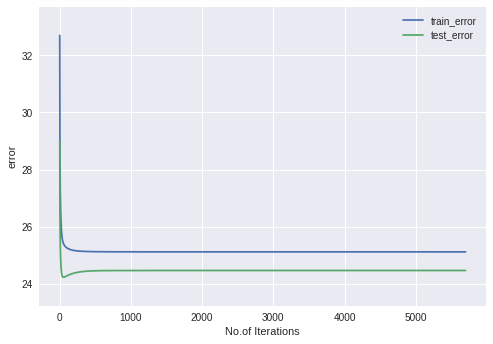

In [11]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
train_errors=[]
test_errors=[]
iterations=[]
def gradient_descent(x_i,y_i,learning_rate ,w,intercept,no_of_iterations,test_x,test_y):
  for i in range(no_of_iterations):
    predicted=np.dot(x_i,w)  #predicted output using current normal vector
    error=predicted-y_i      # Error of while predicting
    gradient=np.dot(x_i.T,error) #multiplying (w.x_i-y_i)*x_i
    ###
    predicted1=np.dot(test_x,w)
    error1=predicted1-test_y
    test_error_sum=np.sum(output_transform.inverse_transform(error1**2))/len(test_x)
    test_errors.append(test_error_sum)
    ###
    previous_w=w        # previous w used for how much is normal vector is changed so that it would be useful toterminate the loop.
    w=w-learning_rate * gradient # 'w' is new computed normal vector which is subtracted from previousw times learning rate which is alpha
    train_error=np.sum(output_transform.inverse_transform(error**2))/len(train_x)   # summing the whole error it is useful for how much error is decreased from one iteration to another iteration
    intercept=intercept-learning_rate*train_error
    train_errors.append(train_error)
    iterations.append(i+1)
    if(sum(w-previous_w <=0.000000001)==13):
      print("No.of iterations required for converging",i)
      MSE=np.sum(output_transform.inverse_transform(error**2))/len(train_x)
      print("The error is",MSE)
      
      return w,intercept,MSE
  return w,intercept,MSE




def gradient_descent_b(x_i,y_i,learning_rate ,w,intercept,no_of_iterations,test_x,test_y):
  for i in range(no_of_iterations):
    predicted=np.dot(x_i,w)+intercept  #predicted output using current normal vector
    error=np.sum(predicted-y_i )     # Error of while predicting
    #gradient=np.dot(x_i.T,error) #multiplying (w.x_i-y_i)*x_i
    ###
    #predicted1=np.dot(test_x,w)
    #error1=predicted1-test_y
    #test_error_sum=np.sum(output_transform.inverse_transform(error1**2))/len(test_x)
    #test_errors.append(test_error_sum)
    ###
    previous_intercept=intercept      # previous w used for how much is normal vector is changed so that it would be useful toterminate the loop.
    intercept=intercept-learning_rate * error # 'w' is new computed normal vector which is subtracted from previousw times learning rate which is alpha
    #train_error=np.sum(output_transform.inverse_transform(error**2))/len(train_x)   # summing the whole error it is useful for how much error is decreased from one iteration to another iteration
    #intercept=intercept-learning_rate*train_error
    #train_errors.append(train_error)
    #iterations.append(i+1)
    #if(sum(w-previous_w <=0.000000001)==13):
     # print("No.of iterations required for converging",i)
     # print("The error is",np.sum(output_transform.inverse_transform(error**2))/len(train_x))
      
      #return w,intercept
  #return w,intercept
  print(intercept)
  return intercept





w=gradient_descent(train_x,train_y,0.0001,np.random.normal(0,0.01,13),0,100000,test_x,test_y)
#print(w)  
intercept=gradient_descent_b(train_x,train_y,0.0001,w[0],0,10000,test_x,test_y)
plt.plot(iterations,train_errors,label="train_error")
plt.plot(iterations,test_errors,label="test_error")
min_list=[np.min(train_errors),np.min(test_errors)]#gradient_descent(train_x,train_y,0.0001,np.random.normal(0,0.01,13),0,100000,test_x,test_y)
max_list=[np.max(train_errors),np.max(test_errors)]
plt.ylim(np.min(min_list)-1,np.max(max_list)+1)
plt.grid(True)
plt.xlabel("No.of Iterations")
plt.ylabel("error")
plt.legend()
plt.show()



#Observation
**From the above plot we can see that as the no.of iterations increasing the error is decresed for both traing and test data and forms an L shape which means model is performance is good  **




**For the gradient descent algorithm I have chosen the learning_rate to be 0.0001 and initial intercept to be '0' and to converge, algorithm took 4183 iterations.**


**gradient_descent() Parameters:**

**house_features** : input features<br>
**house_price** : output values<br>
**learning_rate**: rate at whcih gradient learn <br>
**w** : Initial normal vector from N(0,0.01)<br>
**Initial intercept** : 0<br>
**No.of iterations** : 100000


 

In [47]:
#!pip install beautifultable
from beautifultable import BeautifulTable
table = BeautifulTable()
table.insert_column(0,"sklearn",lr_plane.coef_)
table.insert_column(1,"implemented",w[0])


table1 = BeautifulTable()
table1.column_headers=["sklaern_intercept","impemented_code_intercept"]
table1.insert_row(0,[lr_plane.intercept_,intercept])
print(table)
print("**************************************")
print(table1)


+---------+-------------+
| sklearn | implemented |
+---------+-------------+
| -0.094  |   -0.094    |
+---------+-------------+
|  0.132  |    0.132    |
+---------+-------------+
|  0.024  |    0.023    |
+---------+-------------+
|  0.079  |    0.08     |
+---------+-------------+
| -0.262  |   -0.263    |
+---------+-------------+
|  0.237  |    0.237    |
+---------+-------------+
|  0.098  |    0.098    |
+---------+-------------+
| -0.334  |   -0.335    |
+---------+-------------+
|  0.301  |    0.302    |
+---------+-------------+
| -0.212  |   -0.211    |
+---------+-------------+
| -0.251  |   -0.251    |
+---------+-------------+
|  0.093  |    0.093    |
+---------+-------------+
| -0.483  |   -0.483    |
+---------+-------------+
**************************************
+-------------------+---------------------------+
| sklaern_intercept | impemented_code_intercept |
+-------------------+---------------------------+
|       0.007       |           0.007           |
+------

# Mean square error of train/test data with Implemeted SGD

In [22]:

from sklearn.metrics import mean_squared_error,r2_score
print("Mean square Error for Train data is ",w[2])
imp_prediction=np.dot(test_x,w[0])
print("Mean square Error for Test data", mean_squared_error(output_transform.inverse_transform(test_y),output_transform.inverse_transform(imp_prediction)))


Mean square Error for Train data is  25.123389382961335
Mean square Error for Test data 17.823474652899513


**The MSE on test data is less than train error which indicates that model is working pretty well. **

# Plot of  y_predicted vs y_true for implemented sgd


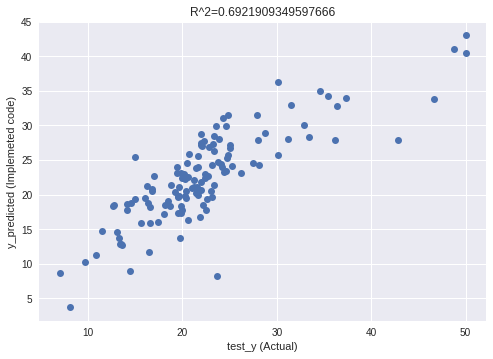

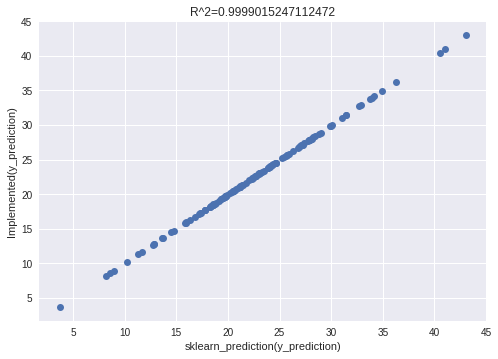

In [49]:
plt.plot(output_transform.inverse_transform(test_y),output_transform.inverse_transform(sklearn_predicted),"o")
plt.grid(True)
plt.title("R^2="+str(r2_score(output_transform.inverse_transform(test_y),output_transform.inverse_transform(imp_prediction))))
plt.xlabel("test_y (Actual)")
plt.ylabel("y_predicted (Implemeted code)")
plt.show()

plt.plot(output_transform.inverse_transform(sklearn_predicted),output_transform.inverse_transform(imp_prediction),"o")
plt.grid(True)
plt.title("R^2="+str(r2_score(output_transform.inverse_transform(sklearn_predicted),output_transform.inverse_transform(imp_prediction))))
plt.xlabel("sklearn_prediction(y_prediction)")
plt.ylabel("Implemented(y_prediction)")
plt.show()

# Observations
1. **$R^{2}$ plot for Actual_Y vs predicted_Y(Implemented SGD) giving a value of 0.7 which is quite good.**

2.  **Both SGD Implemntation and sklearn are providing same results which we can from above plot which has $R^{2}$=0.99 which is exactly same .**

# sklearn SGD_REGRESSOR

In [51]:
from sklearn.linear_model import SGDRegressor
regression=SGDRegressor(loss="squared_loss",penalty="none")
plane=regression.fit(train_x,train_y)
plane.coef_
predicted_y=plane.predict(test_x)
train_error=plane.predict(train_x)
from beautifultable import BeautifulTable
table=BeautifulTable()
table.insert_column(0,"SGD_REGRESSOR",plane.coef_)
table.insert_column(1,"sklearn",lr_plane.coef_)
table.insert_column(2,"implemented",w[0])

print(table)

table1 = BeautifulTable()
table1.column_headers=["SGD_REGRESSOR_intercept","sklaern_intercept","impemented_code_intercept"]
table1.insert_row(0,[plane.intercept_,lr_plane.intercept_,intercept])
print("**************************************")
print(table1)


+---------------+---------+-------------+
| SGD_REGRESSOR | sklearn | implemented |
+---------------+---------+-------------+
|    -0.072     | -0.094  |   -0.094    |
+---------------+---------+-------------+
|     0.08      |  0.132  |    0.132    |
+---------------+---------+-------------+
|    -0.043     |  0.024  |    0.023    |
+---------------+---------+-------------+
|     0.095     |  0.079  |    0.08     |
+---------------+---------+-------------+
|    -0.127     | -0.262  |   -0.263    |
+---------------+---------+-------------+
|     0.32      |  0.237  |    0.237    |
+---------------+---------+-------------+
|     0.03      |  0.098  |    0.098    |
+---------------+---------+-------------+
|    -0.206     | -0.334  |   -0.335    |
+---------------+---------+-------------+
|     0.077     |  0.301  |    0.302    |
+---------------+---------+-------------+
|    -0.046     | -0.212  |   -0.211    |
+---------------+---------+-------------+
|    -0.213     | -0.251  |   -0.2

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


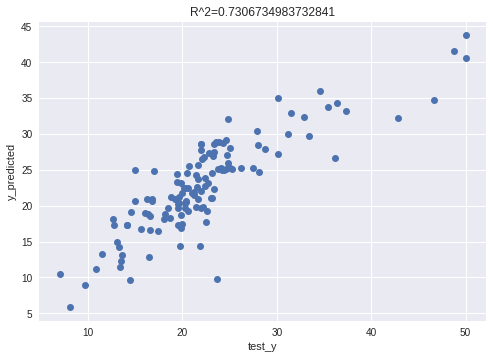

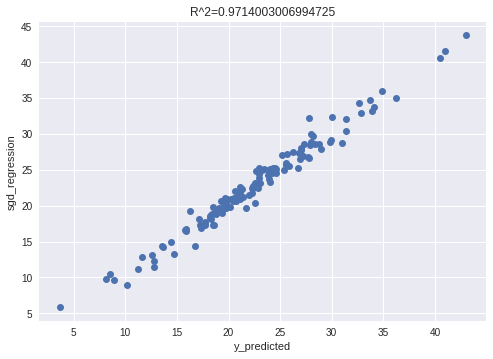

In [52]:
from sklearn.metrics import r2_score
plt.plot(output_transform.inverse_transform(test_y),output_transform.inverse_transform(predicted_y),"o")
plt.grid(True)
plt.title("R^2="+str(r2_score(output_transform.inverse_transform(test_y),output_transform.inverse_transform(predicted_y))))
plt.xlabel("test_y")
plt.ylabel("y_predicted")
plt.show()



plt.plot(output_transform.inverse_transform(imp_prediction),output_transform.inverse_transform(predicted_y),"o")
plt.grid(True)
plt.title("R^2="+str(r2_score(output_transform.inverse_transform(imp_prediction),output_transform.inverse_transform(predicted_y))))
plt.xlabel("y_predicted")
plt.ylabel("sgd_regression")
plt.show()

# Observations
1. **$R^{2}$ plot for Actual_Y vs predicted_Y(Implemented SGD) giving a value of 0.73 which is a better result. **

2. **From the above plot we can see that Both the SGD_REGRESSION and implemented regression providing almost exact results for test data and the  $R^{2}$ =0.97 which is approximately equals to 1.**

# Mean square errors for SGD_REGRESSOR

In [44]:
from sklearn.metrics import mean_squared_error
print("The mean square error for Training data is" ,mean_squared_error(output_transform.inverse_transform(train_y),output_transform.inverse_transform(train_error)))
print("The mean square error for Testing data is" ,mean_squared_error(output_transform.inverse_transform(test_y),output_transform.inverse_transform(predicted_y)))

The mean square error for Training data is 25.161943258148682
The mean square error for Testing data is 16.542764460482385


**The MSE on test data is less than train error which indicates that model is working pretty well. **

# Conclusion:

1. **Analyzed boston house price dataset with sklearn.linear_regression and SGD_own_implmentation and SGD_REEGRESSION and ploted their respective relationship plots.**
2. **Both implemeted SGD code and SGD_REGRESSION having the almost equal MSE Error and they are perfoming almost same.**

3. **When calculated for $R^{2}$ between SGD_implmentation and SGD_REGRESSOR, they have  $R^{2}$ around the 1 which indicates that they are perfoming same on the test data.**